<a href="https://colab.research.google.com/github/adnaaan10/machine-learning/blob/main/Polynomial_regression_on_manufacturing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/manufacturing.csv")
df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [4]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [5]:
df.isnull().sum()

,0
Temperature (°C),0
Pressure (kPa),0
Temperature x Pressure,0
Material Fusion Metric,0
Material Transformation Metric,0
Quality Rating,0


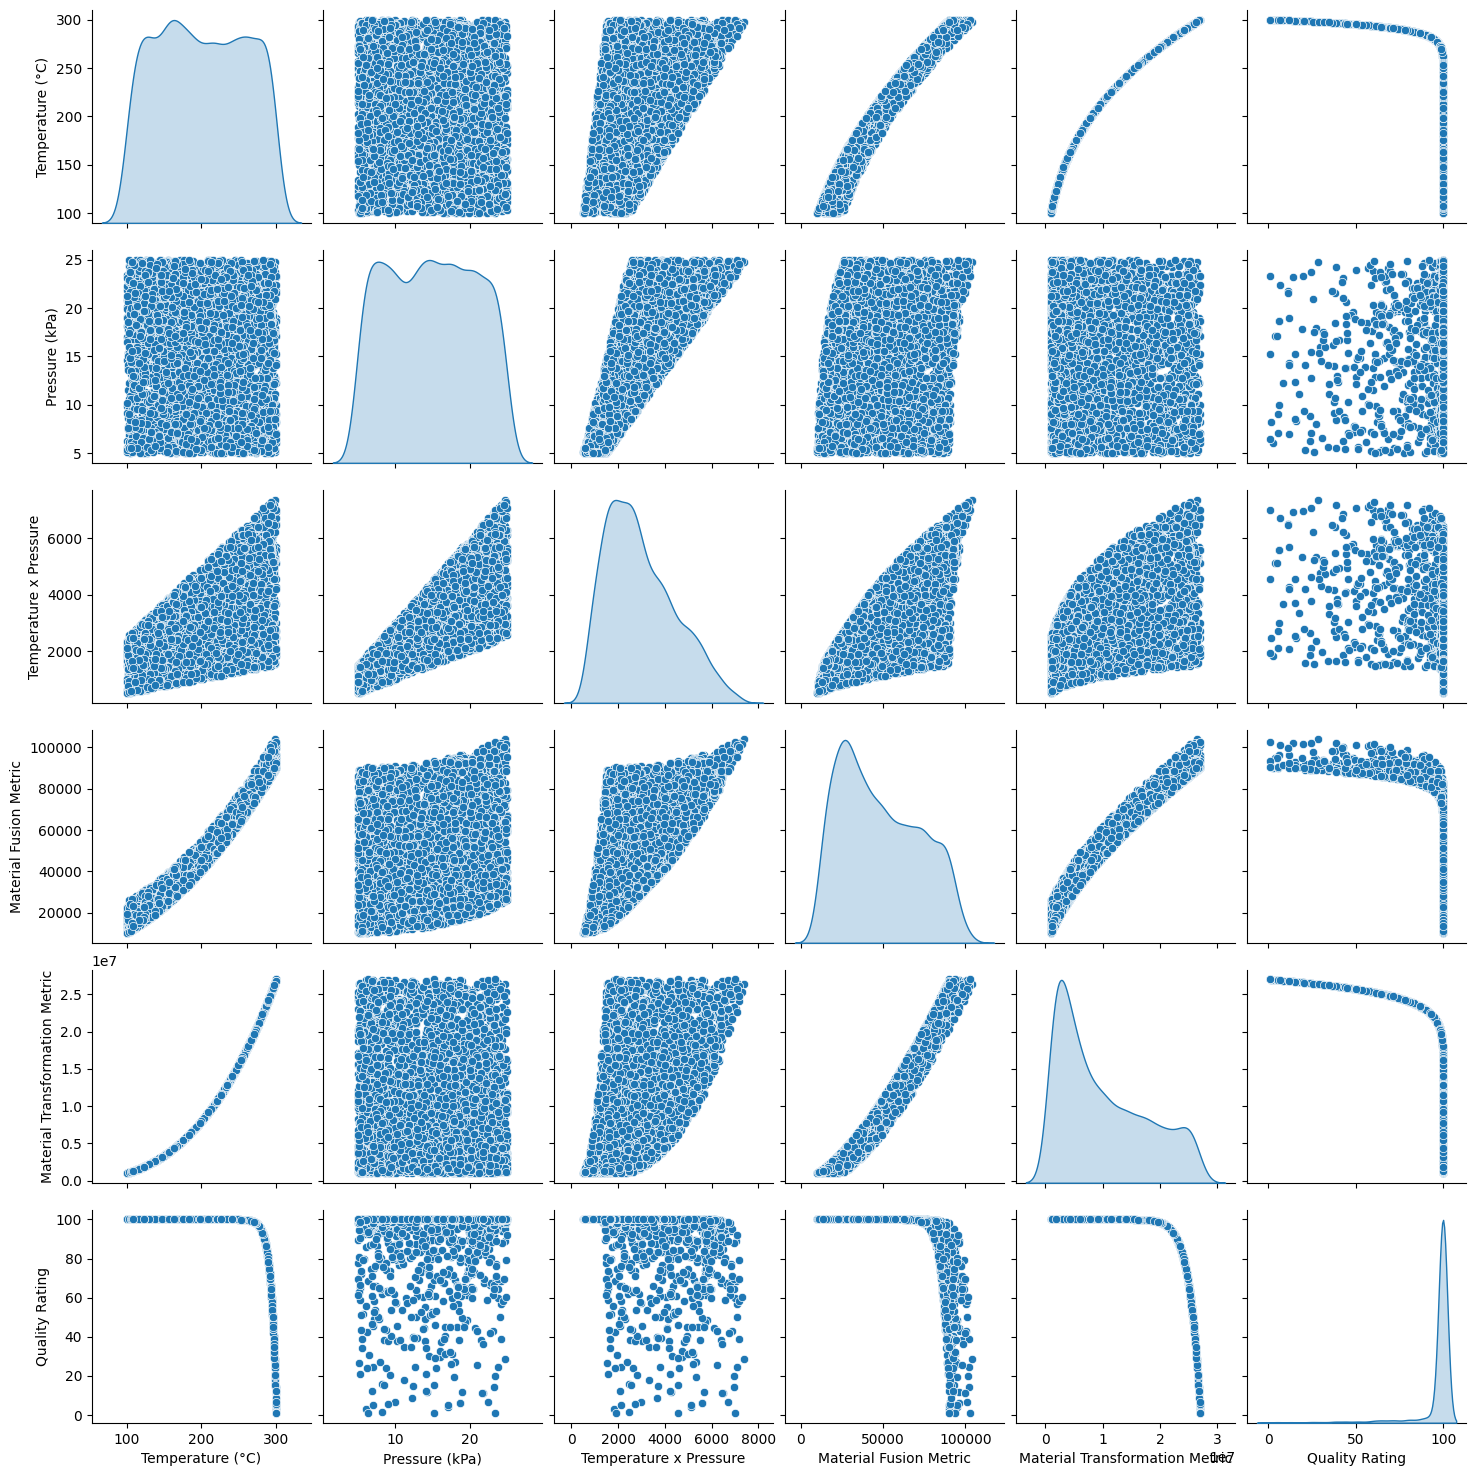

In [6]:
sns.pairplot(df,diag_kind="kde")

In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
X

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06
...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06


In [9]:
y

,Quality Rating
0,99.999971
1,99.985703
2,99.999758
3,99.999975
4,100.000000
...,...
3952,100.000000
3953,99.999997
3954,99.989318
3955,99.999975


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scale=StandardScaler()

In [14]:
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.fit_transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
LR=LinearRegression()

In [17]:
LR.fit(X_train_scale,y_train)

LinearRegression()

In [18]:
LR.score(X_train_scale,y_train)

0.5021702258011791

In [19]:
LR.score(X_test_scale,y_test)

0.5178081214483345

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly=PolynomialFeatures(degree=2,interaction_only=True)
X_train_poly=poly.fit_transform(X_train_scale)
X_test_poly=poly.fit_transform(X_test_scale)

In [22]:
LR.fit(X_train_poly,y_train)

LinearRegression()

In [23]:
y_pred=LR.predict(X_test_poly)

In [24]:
LR.score(X_train_poly,y_train)

0.8218606264369297

In [25]:
LR.score(X_test_poly,y_test)

-8.55006876233098

In [26]:
print(X_train.shape)
print(X_train_poly.shape)

(3165, 5)
(3165, 16)
